In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np 
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


In [3]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

## In 5D

In [4]:
#Load threshold data
M = 50
N = 10000
d = 5
k = 4

#CLUCB parameter......
alpha_clucb = 0.1

alg = 'conslinucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_clucb = a['regret']
arm_pulls_clucb = a['arm_pulls']
update_pol_clucb = a['update_pol']
expt_rewards_clucb = a['reward']
expt_rewards_baseline_clucb = a['reward_baseline']
expt_regret_clucb = a['expt_regret']

alg = 'rarelyswitching'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_rs = a['regret']
arm_pulls_rs = a['arm_pulls']
update_pol_rs = a['update_pol']
expt_rewards_rs = a['reward']
expt_rewards_baseline_rs = a['reward_baseline']
expt_regret_rs = a['expt_regret']

alg = 'threshold'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thr = a['regret']
arm_pulls_thr = a['arm_pulls']
update_pol_thr = a['update_pol']
expt_rewards_thr = a['reward']
expt_rewards_baseline_thr = a['reward_baseline']
expt_regret_thr = a['expt_regret']

alg = 'linucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_ucb = a['regret']
arm_pulls_ucb = a['arm_pulls']
expt_rewards_ucb = a['reward']
expt_rewards_baseline_ucb = a['reward_baseline']
expt_regret_ucb = a['expt_regret']

alg = 'greedy'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_gre = a['regret']
arm_pulls_gre = a['arm_pulls']
expt_rewards_gre = a['reward']
expt_rewards_baseline_gre = a['reward_baseline']
expt_regret_gre = a['expt_regret']

alg = 'thresholdcons'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thrcons = a['regret']
arm_pulls_thrcons = a['arm_pulls']
update_pol_thrcons = a['update_pol']
expt_rewards_thrcons = a['reward']
expt_rewards_baseline_thrcons = a['reward_baseline']
expt_regret_thrcons = a['expt_regret']

alg = 'thresholdmaxcons'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_maxthrcons = a['regret']
arm_pulls_maxthrcons = a['arm_pulls']
update_pol_maxthrcons = a['update_pol']
expt_rewards_maxthrcons = a['reward']
expt_rewards_baseline_maxthrcons = a['reward_baseline']
expt_regret_maxthrcons = a['expt_regret']

alg = 'thresholdmaxconsgreedy'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_maxthrconsgre = a['regret']
arm_pulls_maxthrconsgre = a['arm_pulls']
update_pol_maxthrconsgre = a['update_pol']
expt_rewards_maxthrconsgre = a['reward']
expt_rewards_baseline_maxthrconsgre = a['reward_baseline']
expt_regret_maxthrconsgre = a['expt_regret']

In [12]:
#And the baseline performance violations........
cum_expt_rewards_rs = np.cumsum(expt_rewards_rs, axis = 1)
cum_expt_rewards_baseline_rs = np.cumsum(expt_rewards_baseline_rs, axis = 1)
cum_expt_rewards_ucb = np.cumsum(expt_rewards_ucb, axis = 1)
cum_expt_rewards_baseline_ucb = np.cumsum(expt_rewards_baseline_ucb, axis = 1)
cum_expt_rewards_thr = np.cumsum(expt_rewards_thr, axis = 1)
cum_expt_rewards_baseline_thr = np.cumsum(expt_rewards_baseline_thr, axis = 1)
cum_expt_rewards_thrcons = np.cumsum(expt_rewards_thrcons, axis = 1)
cum_expt_rewards_baseline_thrcons = np.cumsum(expt_rewards_baseline_thrcons, axis = 1)
cum_expt_rewards_gre = np.cumsum(expt_rewards_gre, axis = 1)
cum_expt_rewards_baseline_gre = np.cumsum(expt_rewards_baseline_gre, axis = 1)
cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

cum_expt_rewards_maxthrgre = np.cumsum(expt_rewards_maxthrconsgre, axis = 1)
cum_expt_rewards_baseline_maxthrgre = np.cumsum(expt_rewards_baseline_maxthrconsgre, axis = 1)
cum_expt_rewards_maxthrcons = np.cumsum(expt_rewards_maxthrcons, axis = 1)
cum_expt_rewards_baseline_maxthrcons = np.cumsum(expt_rewards_baseline_maxthrcons, axis = 1)

constraint_violation_clucb = np.mean((cum_expt_rewards_clucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_clucb.T)<0,0)
constraint_violation_ucb = np.mean((cum_expt_rewards_ucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_ucb.T)<0,0)
constraint_violation_thr = np.mean((cum_expt_rewards_thr.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thr.T)<0,0)
constraint_violation_thrcons = np.mean((cum_expt_rewards_thrcons.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thrcons.T)<0,0)

constraint_violation_maxthrgre = np.mean((cum_expt_rewards_maxthrgre.T - (1-alpha_clucb)*cum_expt_rewards_baseline_maxthrgre.T)<0,0)
constraint_violation_maxthrcons = np.mean((cum_expt_rewards_maxthrcons.T - (1-alpha_clucb)*cum_expt_rewards_baseline_maxthrcons.T)<0,0)

all_method_constraints = 100*np.stack((constraint_violation_ucb,
                                       constraint_violation_gre,
                                       constraint_violation_maxthrgre,
                                       constraint_violation_maxthrcons,
                                       constraint_violation_thr,
                                       constraint_violation_thrcons,
                                       constraint_violation_clucb))

df_constraints = pd.DataFrame(data = all_method_constraints.T, columns = ['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'Feasible greedy', 'Feasible conservative', 'CLUCB'], index = range(M))

In [19]:
improvement_maxthrcons = np.zeros(50)
improvement_maxthrconsgre = np.zeros(50)
improvement_rslinucb = np.zeros(50)
improvement_thrcons = np.zeros(50)
improvement_thrconsgre = np.zeros(50)

for idx in range(50):
    improvement_maxthrcons[idx] = np.sum(np.diff(expt_regret_maxthrcons[idx,update_pol_maxthrcons[idx,:]==1])<0)/np.sum(update_pol_maxthrcons[idx,:]==1)
    improvement_maxthrconsgre[idx] = np.sum(np.diff(expt_regret_maxthrconsgre[idx,update_pol_maxthrconsgre[idx,:]==1])<0)/np.sum(update_pol_maxthrconsgre[idx,:]==1)
    improvement_rslinucb[idx] = np.sum(np.diff(expt_regret_rs[idx,update_pol_rs[idx,:]==1])<0)/np.sum(update_pol_rs[idx,:]==1)
    improvement_thrcons[idx] = np.sum(np.diff(expt_regret_thrcons[idx,update_pol_thrcons[idx,:]==1])<0)/np.sum(update_pol_thrcons[idx,:]==1)
    improvement_thrconsgre[idx] = np.sum(np.diff(expt_regret_thr[idx,update_pol_thr[idx,:]==1])<0)/np.sum(update_pol_thr[idx,:]==1)

all_method_improvements = 100*np.stack((improvement_maxthrcons,
                                       improvement_maxthrconsgre,
                                        improvement_thrconsgre,
                                        improvement_thrcons,
                                       improvement_rslinucb))

df_improvements = pd.DataFrame(data = all_method_improvements.T, columns = ['RS-conservative', 'RS-greedy', 'Feasible-greedy', 'Feasible conservative', 'RS-LinUCB'], index = range(M))

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/anaconda2/env

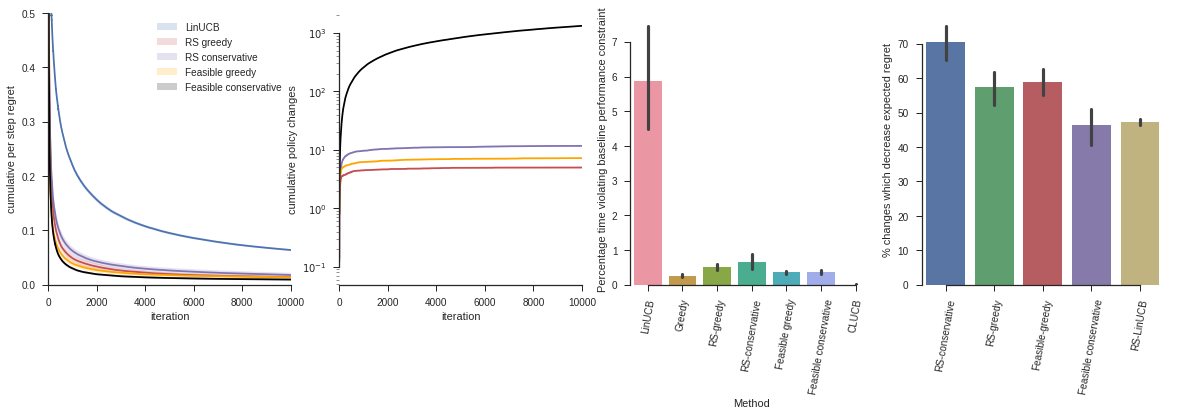

In [21]:
#Plot all on same axis
fig, axes = plt.subplots(1,4,figsize=(20,5))
sns.tsplot(smooth(np.divide(np.cumsum(regret_ucb, axis = 1), np.arange(N)), box_pts = 1), color='C0', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_maxthrconsgre, axis = 1), np.arange(N)), box_pts = 1), color='C2', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_maxthrcons, axis = 1), np.arange(N)), box_pts = 1), color='C3', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_thr, axis = 1), np.arange(N)), box_pts = 1), color='orange', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_thrcons, axis = 1), np.arange(N)), box_pts = 1), color='black', ax = axes[0])

axes[0].set_ylim([0, 0.5])
axes[0].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('cumulative per step regret')
axes[0].legend(['LinUCB', 'RS greedy', 'RS conservative', 'Feasible greedy', 'Feasible conservative'])

#Plot number of policy changes. By definition both greedy and LinUCB are linear
sns.tsplot(np.cumsum(update_pol_maxthrconsgre, axis = 1), color = 'C2', ax = axes[1])
sns.tsplot(np.cumsum(update_pol_maxthrcons, axis = 1), color = 'C3', ax = axes[1])
sns.tsplot(np.cumsum(update_pol_thr, axis = 1), color = 'orange', ax = axes[1])
sns.tsplot(np.cumsum(update_pol_thrcons, axis = 1), color = 'black', ax = axes[1])
axes[1].set_xlim([0, 10000])
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('cumulative policy changes')
axes[1].set_yscale('log')

sns.barplot(data = df_constraints, ax =axes[2])
axes[2].set_xlabel("Method")
axes[2].set_ylabel("Percentage time violating baseline performance constraint")
#axes[2].set_xticks(rotation=80)

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=80)

sns.barplot(data = df_improvements, ax = axes[3])
plt.ylabel("% changes which decrease expected regret")
plt.xticks(rotation=80)

sns.despine(trim = True)

plt.savefig('./figs/compare_methods_maxcon_feasible.pdf')